In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [2]:
data = pd.read_csv('CocaCola_Sales_Rawdata.csv')
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [16]:
# We will extract Quarter values and Year values separately from 'Quarter column'
data['Quarters'] = 0
data['Year'] = 0
for i in range(42):
    p = data["Quarter"][i]
    data['Quarters'][i]= p[0:2]
    data['Year'][i]= p[3:5]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13868\3437195660.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quarters'][i]= p[0:2]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13868\3437195660.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'][i]= p[3:5]


In [17]:
data.head()

,Quarter,Sales,Q1_86,Q1_87,Q1_88,Q1_89,Q1_90,Q1_91,Q1_92,Q1_93,...,Q4_88,Q4_89,Q4_90,Q4_91,Q4_92,Q4_93,Q4_94,Q4_95,Quarters,Year
0,Q1_86,1734.827000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Q2_86,2244.960999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Q3_86,2533.804993,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Q4_86,2154.962997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Q1_87,1547.818996,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data.shape

(42, 88)

In [22]:
# Getting dummy variables for Quarters Q1, Q2, Q3, Q4 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(data['Quarters']))
data = pd.concat([data,Quarters_Dummies],axis = 1)
data.head()

,Quarter,Sales,Q1_86,Q1_87,Q1_88,Q1_89,Q1_90,Q1_91,Q1_92,Q1_93,...,Q4_87,Q4_88,Q4_89,Q4_90,Q4_91,Q4_92,Q4_93,Q4_94,Q4_95,0
0,Q1_86,1734.827000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Q2_86,2244.960999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Q3_86,2533.804993,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Q4_86,2154.962997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Q1_87,1547.818996,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


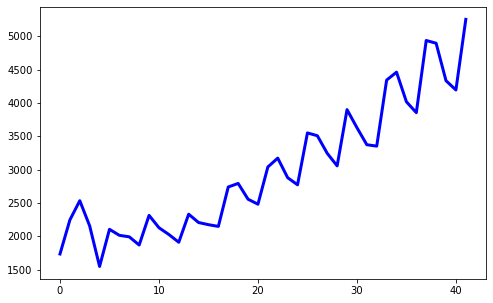

In [23]:
# Lineplot for Sales of CocaCola
plt.figure(figsize=(8,5))
plt.plot(data['Sales'], color = 'blue', linewidth=3)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

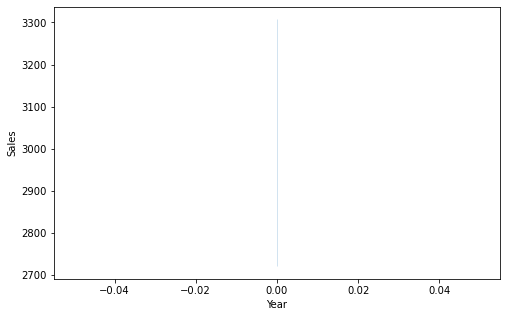

In [24]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Year",y="Sales",data=data)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


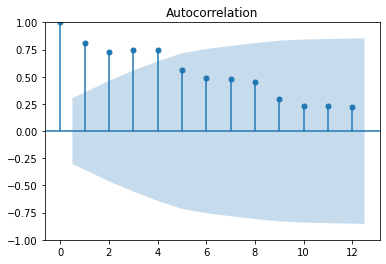

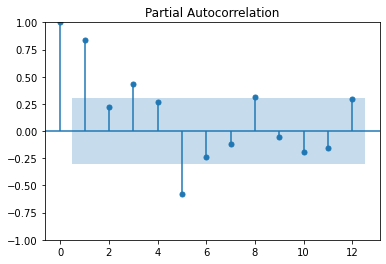

In [25]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=12)
tsa_plots.plot_pacf(data.Sales,lags=12)
plt.show()

In [26]:
#Data Driven Forecasting Methods

In [27]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [28]:
#Splitting Data into Train and Test (77/33)
Train = data.head(32)
Test = data.tail(10)

In [29]:
Train 

,Quarter,Sales,Q1_86,Q1_87,Q1_88,Q1_89,Q1_90,Q1_91,Q1_92,Q1_93,...,Q4_87,Q4_88,Q4_89,Q4_90,Q4_91,Q4_92,Q4_93,Q4_94,Q4_95,0
0,Q1_86,1734.827000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Q2_86,2244.960999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Q3_86,2533.804993,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Q4_86,2154.962997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Q1_87,1547.818996,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Q2_87,2104.411995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,Q3_87,2014.362999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,Q4_87,1991.746998,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8,Q1_88,1869.049999,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,Q2_88,2313.631996,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
Test

,Quarter,Sales,Q1_86,Q1_87,Q1_88,Q1_89,Q1_90,Q1_91,Q1_92,Q1_93,...,Q4_87,Q4_88,Q4_89,Q4_90,Q4_91,Q4_92,Q4_93,Q4_94,Q4_95,0
32,Q1_94,3352.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33,Q2_94,4342.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
34,Q3_94,4461.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
35,Q4_94,4017.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
36,Q1_95,3854.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
37,Q2_95,4936.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
38,Q3_95,4895.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
39,Q4_95,4333.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
40,Q1_96,4194.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41,Q2_96,5253.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
#Moving Average Method

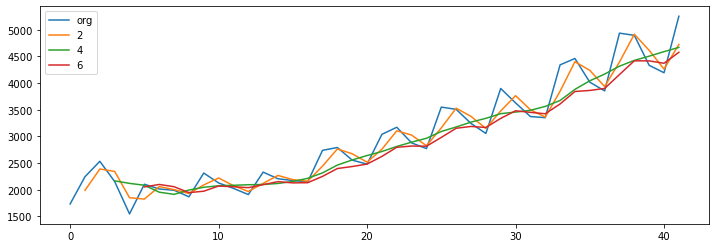

In [37]:
plt.figure(figsize=(12,4))
data.Sales.plot(label="org")
for i in range(2,8,2):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [38]:
#Time series decomposition plot

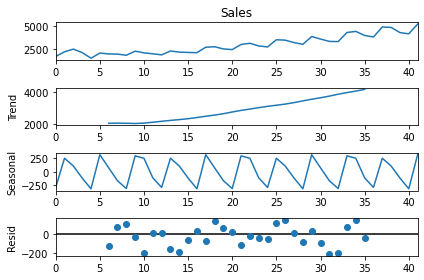

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

In [40]:
#Evaluation Metric RMSE

In [41]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [42]:
#Simple Exponential Method

In [43]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses = RMSE(Test.Sales, pred_ses)
rmse_ses

1034.935892728782

In [44]:
#Holt Method

In [45]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw = RMSE(Test.Sales, pred_hw)
rmse_hw

986.6017427266889

In [46]:
#Holts winter exponential smoothing with additive seasonality and additive trend

In [71]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add = RMSE(Test.Sales, pred_hwe_add_add)
rmse_hwe_add_add

610.1919241262582

In [73]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [74]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_mul_add = RMSE(Test.Sales, pred_hwe_mul_add)
rmse_hwe_mul_add

568.2346162977741

In [75]:
#Model based Forecasting Methods

In [76]:
# Data preprocessing for models
data["t"] = np.arange(1,43)
data["t_squared"] = data["t"]*data["t"]

data["log_sales"] = np.log(data["Sales"])

data.head()

,Quarter,Sales,Q1_86,Q1_87,Q1_88,Q1_89,Q1_90,Q1_91,Q1_92,Q1_93,...,Q4_90,Q4_91,Q4_92,Q4_93,Q4_94,Q4_95,0,t,t_squared,log_sales
0,Q1_86,1734.827000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,7.458663
1,Q2_86,2244.960999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,4,7.716443
2,Q3_86,2533.804993,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,9,7.837477
3,Q4_86,2154.962997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,5,25,7.344602


In [77]:
#Splitting data into Train and Test
Train = data.head(32)
Te = data.tail(10)

In [79]:
Train

,Quarter,Sales,Q1_86,Q1_87,Q1_88,Q1_89,Q1_90,Q1_91,Q1_92,Q1_93,...,Q4_90,Q4_91,Q4_92,Q4_93,Q4_94,Q4_95,0,t,t_squared,log_sales
0,Q1_86,1734.827000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,7.458663
1,Q2_86,2244.960999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,4,7.716443
2,Q3_86,2533.804993,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,9,7.837477
3,Q4_86,2154.962997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,5,25,7.344602
5,Q2_87,2104.411995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,6,36,7.651791
6,Q3_87,2014.362999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,7,49,7.608058
7,Q4_87,1991.746998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,9,81,7.533186
9,Q2_88,2313.631996,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,10,100,7.746574


In [80]:
Test

,Quarter,Sales,Q1_86,Q1_87,Q1_88,Q1_89,Q1_90,Q1_91,Q1_92,Q1_93,...,Q4_90,Q4_91,Q4_92,Q4_93,Q4_94,Q4_95,0,t,t_squared,log_sales
32,Q1_94,3352.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,33,1089,8.117312
33,Q2_94,4342.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,34,1156,8.376090
34,Q3_94,4461.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,35,1225,8.403128
35,Q4_94,4017.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,36,1296,8.298291
36,Q1_95,3854.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,37,1369,8.256867
37,Q2_95,4936.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,38,1444,8.504311
38,Q3_95,4895.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,39,1521,8.495970
39,Q4_95,4333.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,40,1600,8.374015
40,Q1_96,4194.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,41,1681,8.341410
41,Q2_96,5253.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,42,1764,8.566555


In [81]:
#Splitting Data

In [99]:
# Splitting data into Train and Test (77/33)
Train = data.head(32)
Test = data.tail(10)

In [100]:
Train

,Quarter,Sales,Q1_86,Q1_87,Q1_88,Q1_89,Q1_90,Q1_91,Q1_92,Q1_93,...,Q4_90,Q4_91,Q4_92,Q4_93,Q4_94,Q4_95,0,t,t_squared,log_sales
0,Q1_86,1734.827000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,7.458663
1,Q2_86,2244.960999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,4,7.716443
2,Q3_86,2533.804993,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,9,7.837477
3,Q4_86,2154.962997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,5,25,7.344602
5,Q2_87,2104.411995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,6,36,7.651791
6,Q3_87,2014.362999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,7,49,7.608058
7,Q4_87,1991.746998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,9,81,7.533186
9,Q2_88,2313.631996,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,10,100,7.746574


In [101]:
Test

,Quarter,Sales,Q1_86,Q1_87,Q1_88,Q1_89,Q1_90,Q1_91,Q1_92,Q1_93,...,Q4_90,Q4_91,Q4_92,Q4_93,Q4_94,Q4_95,0,t,t_squared,log_sales
32,Q1_94,3352.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,33,1089,8.117312
33,Q2_94,4342.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,34,1156,8.376090
34,Q3_94,4461.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,35,1225,8.403128
35,Q4_94,4017.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,36,1296,8.298291
36,Q1_95,3854.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,37,1369,8.256867
37,Q2_95,4936.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,38,1444,8.504311
38,Q3_95,4895.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,39,1521,8.495970
39,Q4_95,4333.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,40,1600,8.374015
40,Q1_96,4194.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,41,1681,8.341410
41,Q2_96,5253.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,42,1764,8.566555


In [83]:
#Linear Model

In [92]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Sales'], pred_linear)
rmse_linear_model

752.9233933232185

In [104]:
#Quadratic Model

In [103]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_quad_model = RMSE(Test['Sales'], pred_Quad)
rmse_quad_model

457.73573555935064

In [107]:
#Additive Seasonality model

In [108]:
add_sea = smf.ols('Sales~Q1_86+Q2_87+Q3_88',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1_86', 'Q2_87', 'Q3_88']]))
rmse_add_sea = RMSE(Test['Sales'], pred_add_sea)
rmse_add_sea

1817.5465906178088

In [109]:
#Additive Seasonality Quadratic model

In [113]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1_86+Q2_87+Q3_88',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1_86','Q2_87','Q3_88','t','t_squared']]))
rmse_add_sea_quad = RMSE(Test['Sales'], pred_add_sea_quad)
rmse_add_sea_quad 

497.08608406750943

In [111]:
#Multiplicative Seasonality model

In [114]:
Mul_sea = smf.ols('log_sales~Q1_86+Q2_87+Q3_88',data=Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mul_sea = RMSE(Test['Sales'], np.exp(pred_Mult_sea))
rmse_Mul_sea

1882.9491756433008

In [115]:
#Multiplicative Addictive Seasonality Model

In [116]:
Mul_Add_sea = smf.ols('log_sales~t+Q1_86+Q2_87+Q3_88',data = Train).fit()
pred_Mul_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mul_add_sea = RMSE(Test['Sales'], np.exp(pred_Mul_add_sea))
rmse_Mul_add_sea

590.28977302708

In [134]:
data.head()

,Quarter,Sales,Q1_86,Q1_87,Q1_88,Q1_89,Q1_90,Q1_91,Q1_92,Q1_93,...,Q4_90,Q4_91,Q4_92,Q4_93,Q4_94,Q4_95,0,t,t_squared,log_sales
0,Q1_86,1734.827000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,7.458663
1,Q2_86,2244.960999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,4,7.716443
2,Q3_86,2533.804993,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,9,7.837477
3,Q4_86,2154.962997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,5,25,7.344602


In [135]:
final_model = smf.ols('Sales~t+t_squared+Q1_86+Q2_87+Q3_88',data=data).fit()
pred_final = pd.Series(final_model.predict(data[['Q1_86','Q2_87','Q3_88','t','t_squared']]))
rmse_final_model = RMSE(data['Sales'], pred_final)
rmse_final_model

302.3040586815502

In [136]:
pred_df = pd.DataFrame({'Actual' : data.Sales, 'Predicted' : pred_final})
pred_df

,Actual,Predicted
0,1734.827000,1734.827000
1,2244.960999,2015.143253
2,2533.804993,2018.128022
3,2154.962997,2024.766584
4,1547.818996,2035.058940
5,2104.411995,2104.411995
6,2014.362999,2066.605036
7,1991.746998,2087.858774
8,1869.049999,2112.766307
9,2313.631996,2141.327633
